# Visualisation of reproduced results

In [1]:
import csv
import os
import numpy as np
import matplotlib.pyplot as plt

## load data

In [2]:
# os.listdir()

In [3]:
path_to_results = "server_results/maze_trpo/start-maze11-trpo-onlyFeas-debugged_2019_01_30_11_33_55_"
file_name = "progress.csv"

stat_categories = ['Outer_iter', 'Outer_Success', 'Outer_MeanRewards', 'GenGoal_frac_High rewards',
                   'GenGoal_frac_Other', 'GenGoal_frac_Good goals', 'GenGoal_frac_Performance Variation',
                   'GenGoal_frac_Low rewards']

data = np.array([])
num_runs = 10
for run in range(num_runs):
    file_path = path_to_results + "{:04d}".format(run+1) + "/" + file_name
    with open(file_path, 'r') as csvfile:
        data_file = csv.reader(csvfile, delimiter=',', quotechar='|')

        file_content = []
        for row in data_file:
            file_content.append(row)
        
  


        column_titles = file_content[0]
        # print(column_titles)
        
        reordering_index = [column_titles.index('Outer_iter'),
                            column_titles.index('Outer_Success'),
                            column_titles.index('Outer_MeanRewards'),
                            column_titles.index('GenGoal_frac_High rewards'),
                            column_titles.index('GenGoal_frac_Other'),
                            column_titles.index('GenGoal_frac_Good goals'),
                            column_titles.index('GenGoal_frac_Performance Variation'),
                            column_titles.index('GenGoal_frac_Low rewards')]
        
        
        file_data = np.array([])
        for row in file_content[1:]:
            # print(np.array([float(i) for i in row]).shape)
            if(file_data.shape == (0,)):
                file_data = np.array([float(i) for i in row])
            else:
                file_data = np.vstack((file_data, np.array([float(i) for i in row])))
                
        
        ### reordering ###
        file_data = file_data[:, reordering_index]
       
    if(data.shape == (0,)):
        data = np.array([file_data])
    else:
        data = np.vstack((data, [file_data]))

In [4]:
def reorder_array(array, order):
    array = array[:, order]
    return array

a = np.array([[0, 1, 2, 3, 4, 5, 6, -1], [0, 1, 2, 3, 4, 5, 6, -1]])
print(a.shape)
b = [7,0,1,2,3,4,5,6]
print(a.shape)

c = reorder_array(a, b)
print(c)

(2, 8)
(2, 8)
[[-1  0  1  2  3  4  5  6]
 [-1  0  1  2  3  4  5  6]]


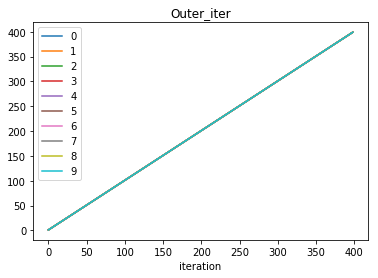

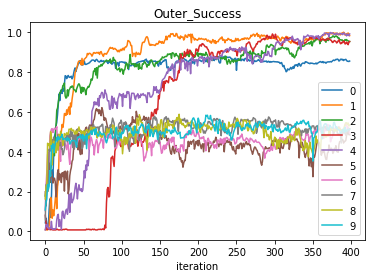

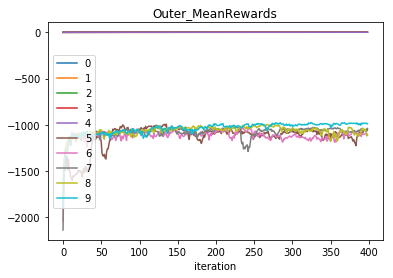

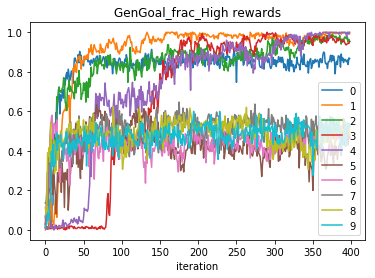

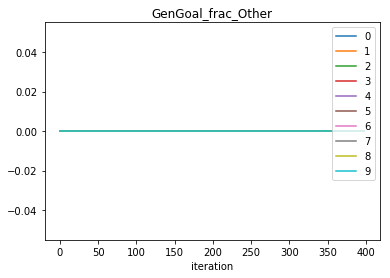

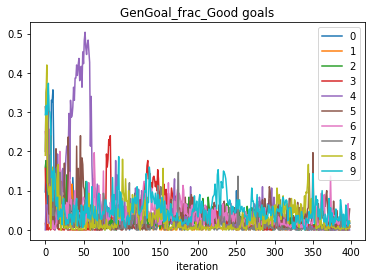

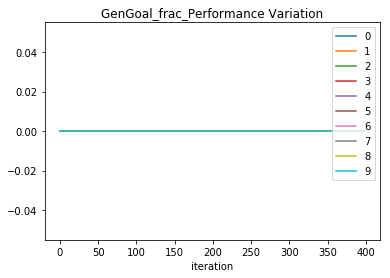

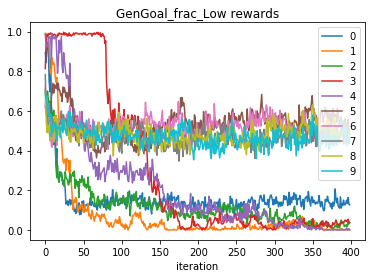

In [5]:
num_runs = 10
iteration_per_run = 399
stat_categories = ['Outer_iter', 'Outer_Success', 'Outer_MeanRewards', 'GenGoal_frac_High rewards',
                   'GenGoal_frac_Other', 'GenGoal_frac_Good goals', 'GenGoal_frac_Performance Variation',
                   'GenGoal_frac_Low rewards']
stat_types = len(stat_categories)


for stat_type in range(stat_types):
    plt.title(stat_categories[stat_type])
    plt.xlabel("iteration")
    for run in range(num_runs):
        plt.plot(range(iteration_per_run), data[run, :, stat_type], label=run)
    plt.legend()
    plt.show()